# Analisis de venta por hora para las sucursales
Se espera encontrar el porcentaje de venta por turno y poder hacer pronostico de ventas tomando en cuenta la venta por hora segun cada dia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
import calendar
from functools import reduce
from openpyxl import load_workbook
from functools import reduce


# Descarga de datos y creacion de diccionario

In [2]:
Tdata = pd.ExcelFile('Tepeyac-ventaxhora.xlsx')
Pdata = pd.ExcelFile('Palomar-ventaxhora.xlsx')
Idata = pd.ExcelFile('Inglaterra-ventaxhora.xlsx')
sheet_to_df_map = {}
sheet_to_df_map['T'] = {}
sheet_to_df_map['P'] = {}
sheet_to_df_map['I'] = {}
def sheets(sheet_to_df_map,sheet,data,empresa):
    sheet_to_df_map[empresa][sheet]=data.parse(sheet)
    return  sheet_to_df_map
E=[Tdata,Pdata,Idata]
S=['T','P','I']
z=list(map(lambda e,s:list(map(lambda sheet:sheets(sheet_to_df_map,sheet,e,s),e.sheet_names)),E,S))


## Filtracion de dias para las 3 empla primera vez fue de 4 semanas para generar un promedio, en esta ocasion se cuentan con 12 semanas para generarlo

In [3]:
y=list(map(lambda s:list(map(lambda d:list(reduce(lambda x,y:x+y,list(map(lambda sh:sheet_to_df_map[s][sh].iloc[0:15,2+4*d],Tdata.sheet_names)))/len(Tdata.sheet_names)),range(7))),S))

# Resultados

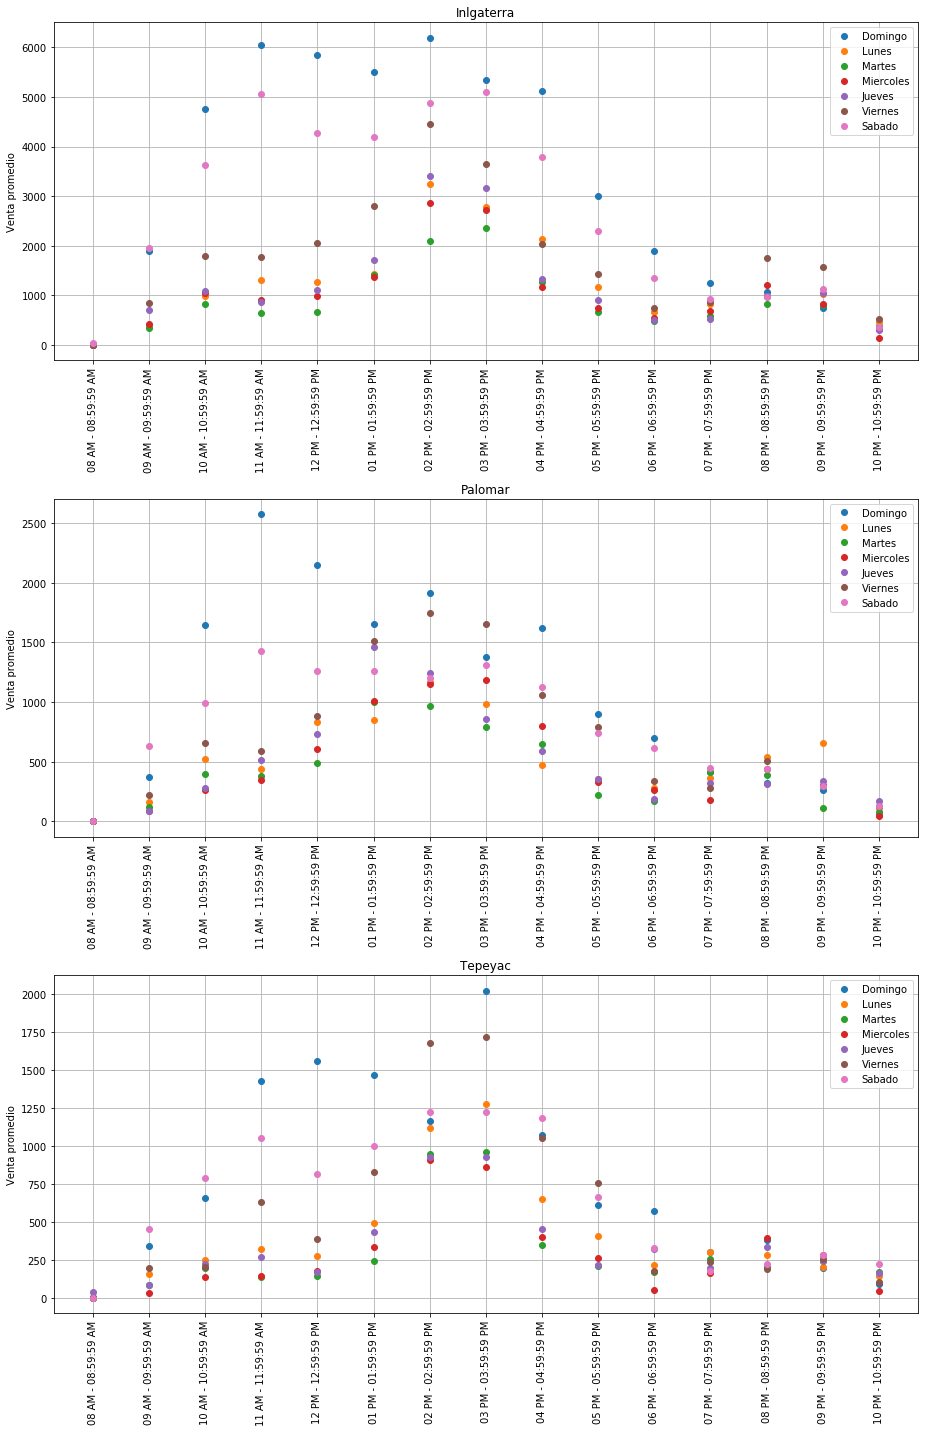

In [4]:
plt.figure(1,figsize=[13,20])
plt.subplot(311)
dias=['Domingo','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado']
list(map(lambda d,t:plt.plot(range(15),y[2][d],'o',label=t),range(7),dias))
plt.title("Inlgaterra")
plt.ylabel('Venta promedio')
plt.legend()
plt.grid()
plt.xticks(range(15),sheet_to_df_map['I']['16-22_09'].iloc[0:15,0],rotation=90)
plt.subplot(312)
list(map(lambda d,t:plt.plot(range(15),y[1][d],'o',label=t),range(7),dias))
plt.title("Palomar")
plt.ylabel('Venta promedio')
plt.legend()
plt.grid()
plt.xticks(range(15),sheet_to_df_map['I']['16-22_09'].iloc[0:15,0],rotation=90)
plt.subplot(313)
list(map(lambda d,t:plt.plot(range(15),y[0][d],'o',label=t),range(7),dias))
plt.title("Tepeyac")
plt.ylabel('Venta promedio')
plt.legend()
plt.grid()
plt.xticks(range(15),sheet_to_df_map['I']['16-22_09'].iloc[0:15,0],rotation=90)
plt.tight_layout()
plt.show()


# %Porcentajes de ventas segun los turnos
### Aqui se presenta el inconveniente de que los turnos finalizan a las 4:30 pm por lo cual se debe de cuestionar si la venta de 4 a 5 pm es del turno de la tarde o de la mañana, este parametro cambia la variable, Division_Turno, de 9 a 8 si es de la mañana o de la tarde respectivamente

In [5]:
Divison_Turno=8
p=list(map(lambda s:list(map(lambda d:np.sum(y[s][d][0:Divison_Turno])/np.sum(y[s][d]),range(7))),range(3)))
df = pd.DataFrame(index=dias,columns=['%Venta T/M I', '%Venta T/M P','%Venta T/M T','%Venta T/V I','%Venta T/V P','%Venta T/V T'], dtype='float')
df.index.name = "Dias"
df.iloc[:,0]=p[2]
df.iloc[:,1]=p[1]
df.iloc[:,2]=p[0]
df.iloc[:,3]=np.ones(7)-p[2]
df.iloc[:,4]=np.ones(7)-p[1]
df.iloc[:,5]=np.ones(7)-p[0]
df

,%Venta T/M I,%Venta T/M P,%Venta T/M T,%Venta T/V I,%Venta T/V P,%Venta T/V T
Dias,,,,,,
Domingo,0.725707,0.732996,0.727505,0.274293,0.267004,0.272495
Lunes,0.610366,0.641259,0.638547,0.389634,0.358741,0.361453
Martes,0.626301,0.670544,0.630050,0.373699,0.329456,0.369950
Miercoles,0.659889,0.663338,0.618836,0.340111,0.336662,0.381164
Jueves,0.683506,0.694347,0.614232,0.316494,0.305653,0.385768
Viernes,0.660062,0.679935,0.670594,0.339938,0.320065,0.329406
Sabado,0.729539,0.679871,0.680646,0.270461,0.320129,0.319354


In [13]:
total_per_day=list(map(lambda s:list(map(lambda d:sum(y[s][d]),range(7))),range(3)))
a=np.asmatrix(total_per_day)

In [21]:
sales_between_9_to_11=list(map(lambda s:list(map(lambda d:sum(y[s][d][0:3]),range(7))),range(3)))
t=np.asmatrix(sales_between_9_to_11)

In [36]:
df=pd.DataFrame(t/a*100,index=['Tepeyac','Palomar','Inglaterra'],columns=dias)
df.index.name = "Sucursal"
print('En promedio las ventas entre las 8 y las 11 de la mañana la venta representa sobre el total del dia estos porcentajes')
df

En promedio las ventas entre las 8 y las 11 de la mañana la venta representa sobre el total del dia estos porcentajes


,Domingo,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado
Sucursal,,,,,,,
Tepeyac,8.394472,6.718609,6.640529,4.010328,6.969263,4.720094,12.907556
Palomar,12.634700,8.817985,8.336257,5.003324,4.938147,8.236072,13.692235
Inglaterra,13.627812,7.329863,8.846237,9.452253,10.225451,10.113246,14.074592
